# Research Questions Analysis

This notebook creates visualizations to help answer our research questions:
1. Is the data representative on a global scale and release year basis?
2. Which musical attributes have the greatest impact on track popularity?
3. To what extent do acoustic vs artist attributes influence overall track popularity?

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

sns.set_theme()

In [28]:
DIR = './Data/'
TRACK_FILE = 'spotify_tracks_kaggle_weekly.csv'
ARTIST_FILE = 'spotify_tracks_artist_details.csv'

tracks = pd.read_csv(DIR + TRACK_FILE)
artists = pd.read_csv(DIR + ARTIST_FILE)

df = pd.merge(tracks, artists, on='track_id', how='left')

### Statistics

In [29]:
# Year statistics
print("Year Statistics:")
print(f"Median Year: {df['year'].median()}")
print(f"Latest Year: {df['year'].max()}")
print(f"Earliest Year: {df['year'].min()}")
print("\n")

# Language statistics
total_tracks = len(df)
unique_languages = df['language'].nunique()
language_counts = df['language'].value_counts()
language_percentages = (language_counts / total_tracks * 100).round(2)

print(f"Total number of unique languages: {unique_languages}")
print("\nLanguages by Occurrence:")
for lang, count in language_counts.items():
    percentage = language_percentages[lang]
    print(f"{lang}: {count} tracks ({percentage}% of total)")

Year Statistics:
Median Year: 2017.0
Latest Year: 2024
Earliest Year: 1971


Total number of unique languages: 7

Languages by Occurrence:
English: 23392 tracks (37.54% of total)
Unknown: 13005 tracks (20.87% of total)
Tamil: 12681 tracks (20.35% of total)
Korean: 6893 tracks (11.06% of total)
Hindi: 5740 tracks (9.21% of total)
Telugu: 324 tracks (0.52% of total)
Malayalam: 282 tracks (0.45% of total)


### Plots

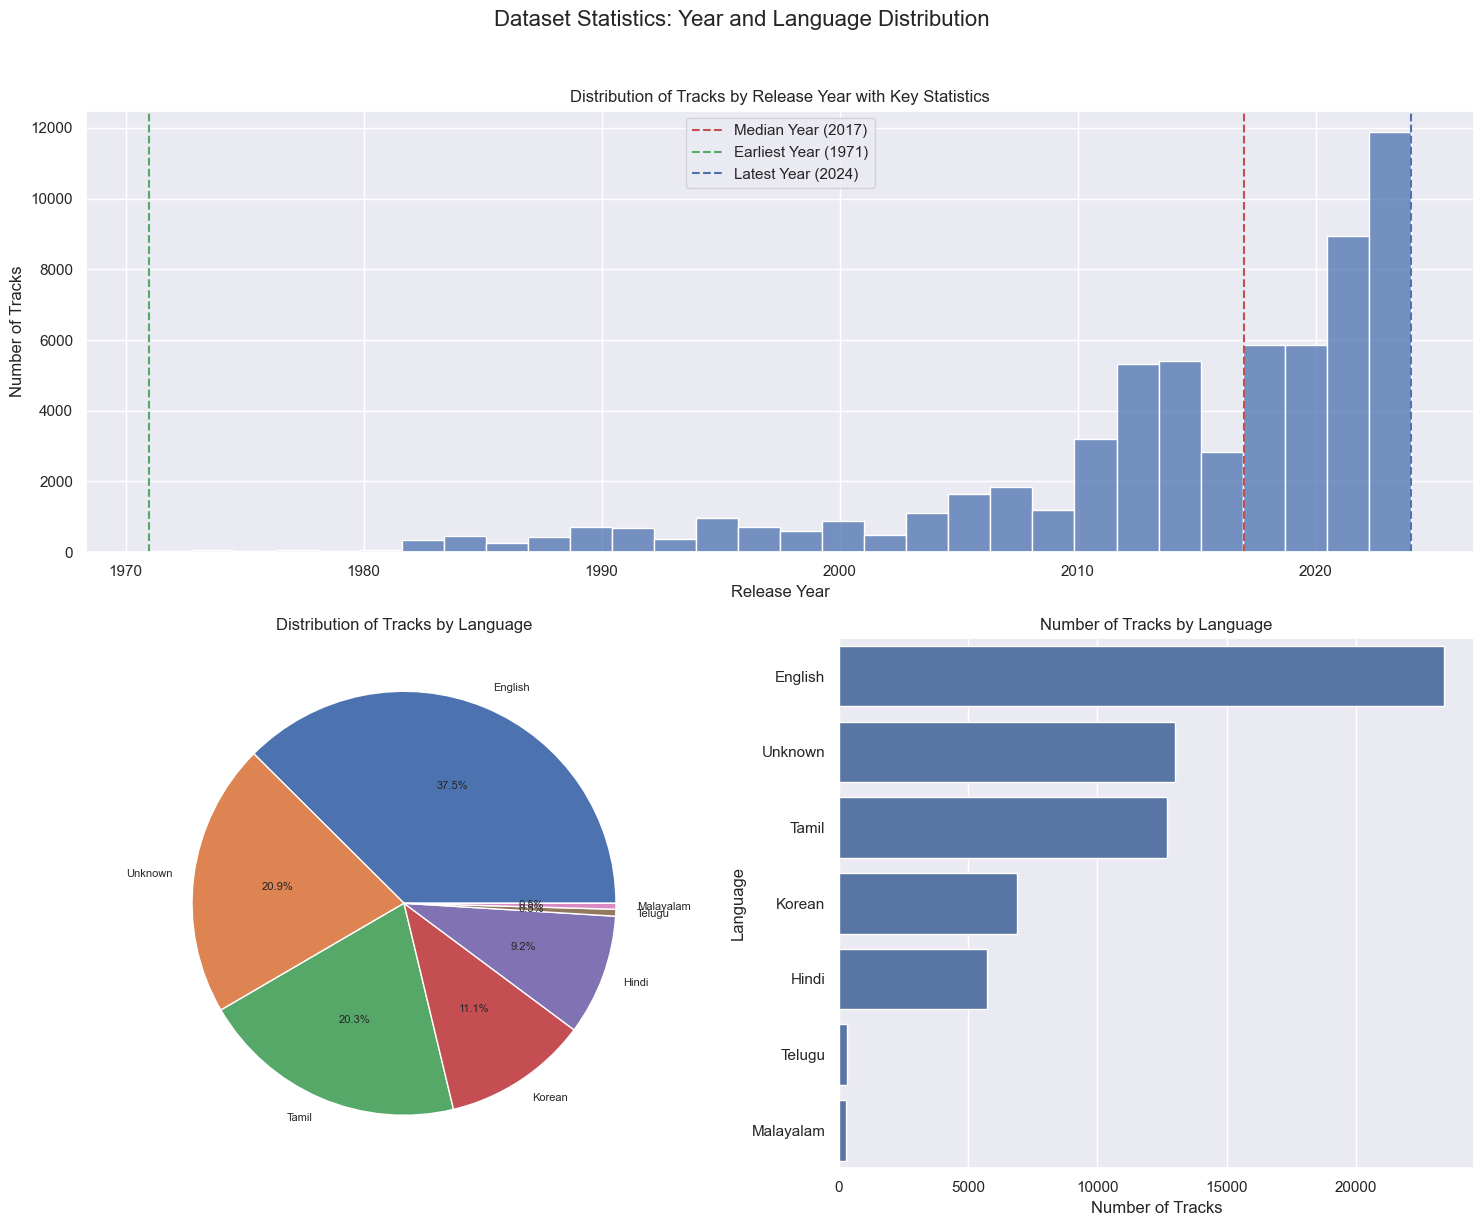

In [30]:
fig = plt.figure(figsize=(15, 12))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

# Year distribution with median marker
ax1 = fig.add_subplot(gs[0, :])
sns.histplot(data=df, x='year', bins=30, ax=ax1)
median_year = df['year'].median()
ax1.axvline(x=median_year, color='r', linestyle='--', label=f'Median Year ({median_year:.0f})')
ax1.axvline(x=df['year'].min(), color='g', linestyle='--', label=f'Earliest Year ({df["year"].min():.0f})')
ax1.axvline(x=df['year'].max(), color='b', linestyle='--', label=f'Latest Year ({df["year"].max():.0f})')
ax1.set_title('Distribution of Tracks by Release Year with Key Statistics')
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Number of Tracks')
ax1.legend()

# Language distribution
ax2 = fig.add_subplot(gs[1, 0])
language_counts = df['language'].value_counts()
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%', 
        textprops={'fontsize': 8})
ax2.set_title('Distribution of Tracks by Language')

# Language bar plot
ax3 = fig.add_subplot(gs[1, 1])
sns.barplot(x=language_counts.values, y=language_counts.index, ax=ax3)
ax3.set_title('Number of Tracks by Language')
ax3.set_xlabel('Number of Tracks')
ax3.set_ylabel('Language')

plt.suptitle('Dataset Statistics: Year and Language Distribution', fontsize=16, y=1.02)

plt.tight_layout()
plt.savefig('../../Prod/Images/research_questions/q_1.png')
plt.show()

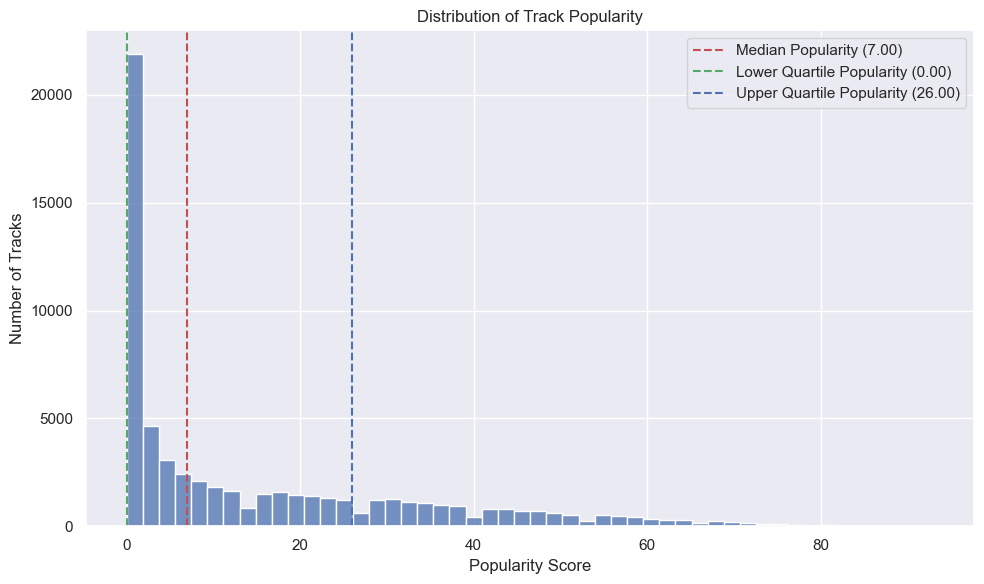


Popularity Statistics:
Total number of tracks: 62,317
Number of tracks with 0 popularity: 17,703 (28.4%)
Mean popularity: 15.36
Median popularity: 7.00


In [36]:
# Histogram of popularity
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='popularity', bins=50)

median_pop = df['popularity'].median()
lower_quartile_pop = df['popularity'].quantile(0.25)
upper_quartile_pop = df['popularity'].quantile(0.75)

plt.axvline(x=median_pop, color='r', linestyle='--', label=f'Median Popularity ({median_pop:.2f})')
plt.axvline(x=lower_quartile_pop, color='g', linestyle='--', label=f'Lower Quartile Popularity ({lower_quartile_pop:.2f})')
plt.axvline(x=upper_quartile_pop, color='b', linestyle='--', label=f'Upper Quartile Popularity ({upper_quartile_pop:.2f})')

plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')

plt.legend()
plt.tight_layout()
plt.savefig('../../Prod/Images/research_questions/q_1_pop.png')
plt.show()

zero_pop_count = len(df[df['popularity'] == 0])
total_tracks = len(df)
zero_pop_percentage = (zero_pop_count/total_tracks) * 100

# Print statistics
print("\nPopularity Statistics:")
print(f"Total number of tracks: {total_tracks:,}")
print(f"Number of tracks with 0 popularity: {zero_pop_count:,} ({zero_pop_percentage:.1f}%)")
print(f"Mean popularity: {df['popularity'].mean():.2f}")
print(f"Median popularity: {df['popularity'].median():.2f}")